# ** Procesamiento de imagen: Mandril (clase práctica)**
Este notebook reproduce el trabajo realizado en clase con la imagen del mandril.
Se exploran los siguientes temas:

Lectura de imagen desde archivo
Visualización en escala de grises
Downsampling (reducción de resolución)
Posterización (reducción de niveles de gris)
Cálculo y visualización de histograma
Información de la imagen: shape, min, max
Además, se incluye una función vectorizada para reducir niveles de gris (ScaleGray) y una función personalizada para calcular el histograma (imhist).

In [1]:
!wget -O mandril.png "https://www.dropbox.com/s/dbwjqs0mfo5hgw6/mandril.png?dl=1"

--2025-04-19 18:45:49--  https://www.dropbox.com/s/dbwjqs0mfo5hgw6/mandril.png?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/fr6sxiar91o0v21lrb3ie/mandril.png?rlkey=kec7fzhsm8p5glly49z38u7mc&dl=1 [following]
--2025-04-19 18:45:49--  https://www.dropbox.com/scl/fi/fr6sxiar91o0v21lrb3ie/mandril.png?rlkey=kec7fzhsm8p5glly49z38u7mc&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6fc698afe36bcb62b6f2113d77.dl.dropboxusercontent.com/cd/0/inline/CoGAwSVc5YvJ0IINWq9i9YpTLivdhnwH7WcOBIU2SVCLZb5qdN0CQUiI78YyOxfP36gJL9q-cT7C-mqm-CqzTF5n03m88bKBhPE0YQ4xbjq7Mdhlk_UOmYwy3C8DqL-91DA/file?dl=1# [following]
--2025-04-19 18:45:49--  https://uc6fc698afe36bcb62b6f2113d77.dl.dropboxusercontent.com/cd/0/inline/CoGAw

# Cargar imagen y convertir a escala de grises

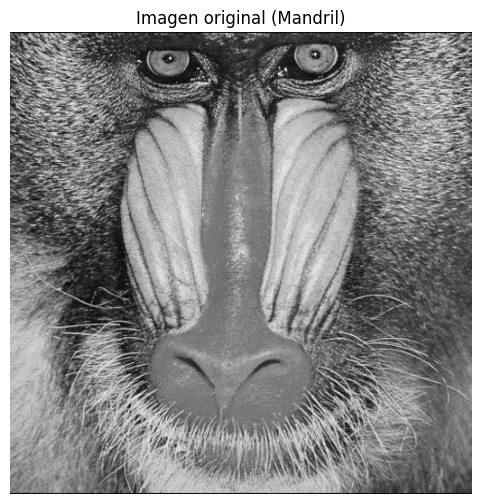

Shape: (512, 512)
Máximo valor: 255
Mínimo valor: 0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as iio
from skimage.color import rgb2gray

# Cargar imagen
X = iio.imread("mandril.png")

# Convertir a escala de grises si es RGB
if X.ndim == 3:
    X = (rgb2gray(X) * 255).astype(np.uint8)

# Mostrar imagen
plt.figure(figsize=(6,6))
plt.imshow(X, cmap='gray')
plt.title("Imagen original (Mandril)")
plt.axis('off')
plt.show()

# Mostrar información básica
print("Shape:", X.shape)
print("Máximo valor:", X.max())
print("Mínimo valor:", X.min())

# Downsampling (reducción de resolución)

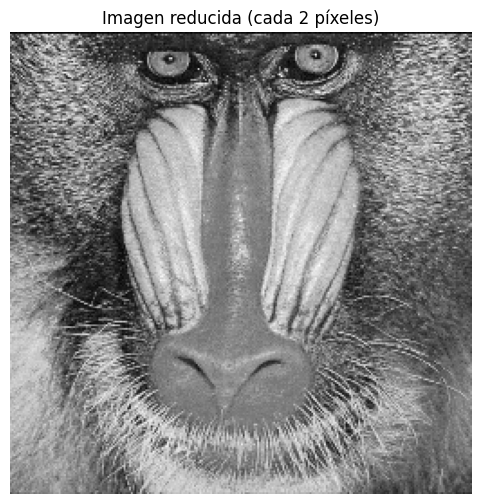

Shape de imagen reducida: (256, 256)


In [3]:
d = 2
(Nx, Mx) = X.shape
ix = range(0, Nx, d)
jx = range(0, Mx, d)
Ny = len(ix)
My = len(jx)

Y = np.zeros((Ny, My), np.uint8)
for i in range(Ny):
    for j in range(My):
        Y[i, j] = X[ix[i], jx[j]]

plt.figure(figsize=(6,6))
plt.imshow(Y, cmap='gray')
plt.title(f"Imagen reducida (cada {d} píxeles)")
plt.axis('off')
plt.show()

print("Shape de imagen reducida:", Y.shape)

# Reducción de niveles de gris (posterización)

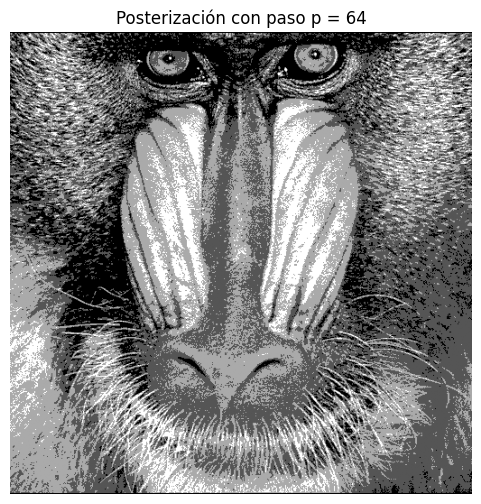

Esta imagen tiene = 4 niveles de gris


In [4]:
p = 64
(Nx, Mx) = X.shape
Y = np.zeros((Nx, Mx), np.uint8)
for i in range(Nx):
    for j in range(Mx):
        x = int(np.fix(X[i,j]/p)*p)
        Y[i,j] = x

plt.figure(figsize=(6,6))
plt.imshow(Y, cmap='gray')
plt.title(f"Posterización con paso p = {p}")
plt.axis('off')
plt.show()

print('Esta imagen tiene =', int(256/p), 'niveles de gris')

# Función vectorizada ScaleGray

In [ ]:
def ScaleGray(img: np.ndarray, d: int) -> np.ndarray:
    return np.floor_divide(img, d) * d

Y_vec = ScaleGray(X, p)

plt.figure(figsize=(6,6))
plt.imshow(Y_vec, cmap='gray')
plt.title("Posterización con ScaleGray()")
plt.axis('off')
plt.show()

# Histograma de la imagen

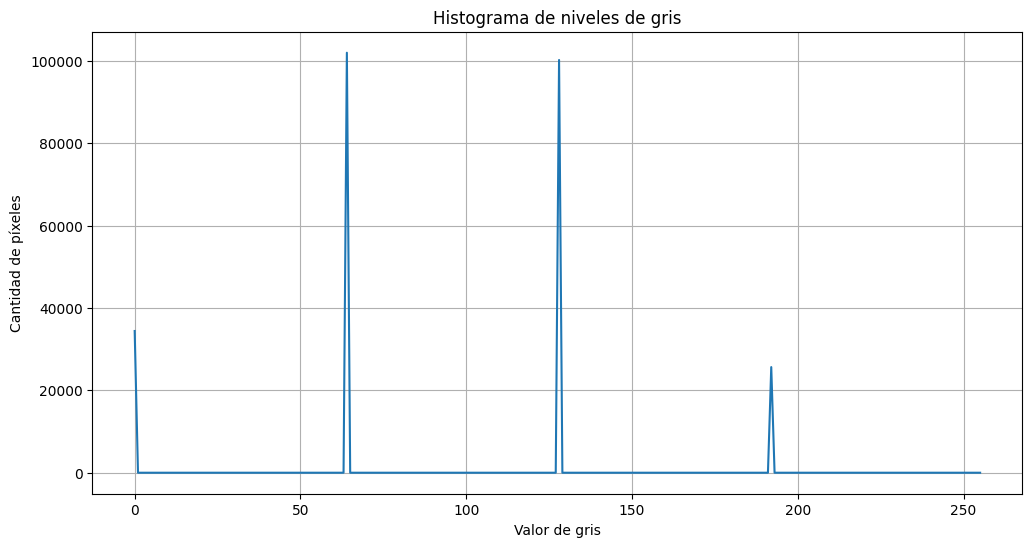

In [5]:
def imhist(X,n=256):
  (N,M) = X.shape
  h = np.zeros((n,))
  for i in range(N):
    for j in range(M):
      x = X[i,j]
      h[x] = h[x]+1
  return h

n = 256
h = imhist(Y, n=n)
plt.figure(figsize=(12,6))
plt.plot(range(n), h[:n])
plt.title("Histograma de niveles de gris")
plt.xlabel("Valor de gris")
plt.ylabel("Cantidad de píxeles")
plt.grid()
plt.show()